In [64]:
from utils import extract_frames
from deeptrack.models import LodeSTAR
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [65]:
%matplotlib inline


In [66]:
def detect(frame, model, alpha=0.5, cutoff=0.99):    
    detections = model.predict_and_detect(frame[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]        
    return detections

In [67]:
frames = extract_frames("data\\videos\\025Hz-01.avi")
model = LodeSTAR(input_shape=(None, None, 3))
model.load_weights("./model/weights")

In [71]:
alpha = 0.1
cutoff = 0.999

1/1 [==============================] - 0s 171ms/step


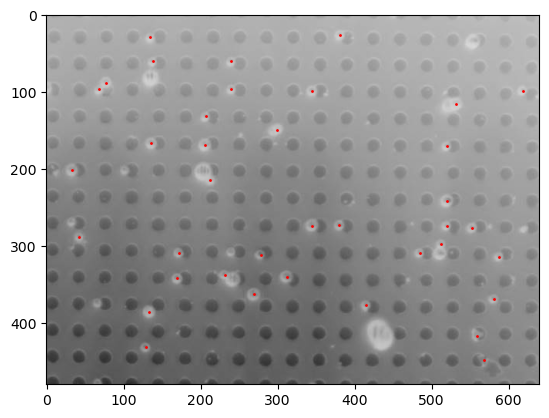

In [72]:
sample = frames[0]
sample_detections = detect(sample, model, alpha=alpha, cutoff=cutoff)
plt.imshow(sample)
plt.scatter(sample_detections[:, 1], sample_detections[:, 0], color="r", s=1)

In [73]:
detected = [detect(frame, model, alpha=alpha, cutoff=cutoff) for frame in frames[:100]]

1/1 [==============================] - 0s 184ms/step


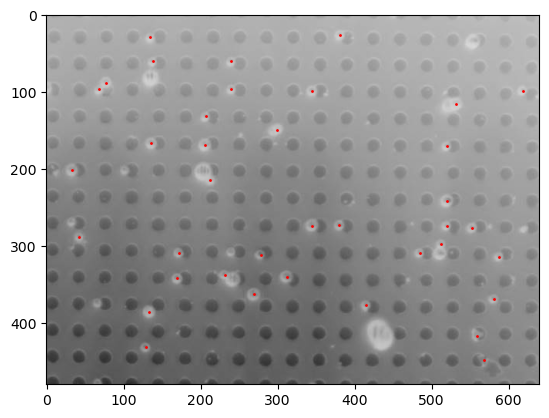

In [74]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    # ax.set_xlim(0., 0.1)
    # ax.set_ylim(0.7, 0.75)
    ax.imshow(frames[i], cmap="gray")
    ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)

ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
ani.save('detected.gif', writer='pillow')

In [92]:
spots = []
for i, frame in enumerate(detected):
    for spot in frame:
        spots.append([i, spot[1], spot[0]])

In [93]:
import pandas as pd
spots_df = pd.DataFrame(spots, columns=["frame", "x", "y"])

In [94]:
from laptrack import LapTrack

In [95]:
lt = LapTrack(gap_closing_max_frame_count=5)
track_df, _, _ = lt.predict_dataframe(spots_df, ["x", "y"], only_coordinate_cols=False)
track_df = track_df.reset_index()


In [96]:
track_df

,frame,index,frame_y,x,y,tree_id,track_id
0,0,0,0,380.529877,25.983250,0,0
1,0,1,0,134.563217,28.506660,1,1
2,0,2,0,137.479538,60.193264,2,2
3,0,3,0,239.567184,60.008331,3,3
4,0,4,0,77.122917,87.728409,4,4
...,...,...,...,...,...,...,...
3963,99,34,99,483.541748,380.406830,64,64
3964,99,35,99,621.411072,381.924683,32,32
3965,99,36,99,204.159485,411.527679,36,36
3966,99,37,99,558.295105,416.325348,35,35


In [97]:
ntracks = track_df["track_id"].nunique()

In [98]:
tracks = []
for track_id in range(ntracks):
    track = track_df[track_df["track_id"] == track_id]
    tracks.append(track)

In [ ]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    # ax.set_xlim(0., 0.1)
    # ax.set_ylim(0.7, 0.75)
    ax.imshow(frames[i], cmap="gray")
    ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)
    # for track in tracks:
    #     ax.plot(track["x"], track["y"])
    ax.plot(tracks[0]["x"], tracks[0]["y"])

ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
ani.save('detected.gif', writer='pillow')

In [ ]:
plt.imshow(frames[i], cmap="gray")
# for track in tracks:
#     ax.plot(track["x"], track["y"])
plt.plot(tracks[0]["x"], tracks[0]["y"])

In [100]:
tracks[0]

,frame,index,frame_y,x,y,tree_id,track_id
0,0,0,0,380.529877,25.983250,0,0
38,1,0,1,380.748138,27.851377,0,0
75,2,0,2,380.423248,30.102268,0,0
111,3,0,3,382.049408,34.436401,0,0
148,4,0,4,383.904663,36.546165,0,0
...,...,...,...,...,...,...,...
3773,95,2,95,517.305603,32.446400,0,0
3813,96,1,96,517.228088,32.374981,0,0
3852,97,0,97,517.544617,33.033089,0,0
3891,98,2,98,518.300110,33.955173,0,0
